#### Project 2

For the purpose of this project I will be local at global warming trends via found Data from various sources and sythesised Data. I will be plotting, programming and displaying the data to me best abiilty. The project is broke into a number of sections with each containing its own references where necessary. A bibliography containing all of the relevant references formatted in the Harvard referencing style is found at the end. 

Contents  

1: Analysis of CO2 vs Temperature Anomaly from 800kyrs – present.

2: Examination of one other (paleo/modern) feature (CH4).

3: Examination of Irish context.

4: Fusing and analysing of Data with it being exported to csv and json formats

5: Analysis of the data, the trends and the relationships between them.

6: Prediction global temperature anomaly over next few decades using synthesised data and comparison of this published climate models if atmospheric CO2 trends continue.

7: Comments on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

##### 1. Analysis of CO2 vs Temperature Anomaly from 800kyrs – present

In [385]:
import pandas as pd
import matplotlib.pyplot as plt

Section to load in Data. Not loading in the data correctly. I need to remove the headings from the data as it is loading them as headings. I need to remove four headings. Update-Headings removed and results shown.

I decided to remove the columns needed and create seperate excel files one with C02 data and ages and one with Temp Data.

In [386]:
df = pd.read_excel('C02 Data.xlsx')
df.head()

,Ice Core Gas Age,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


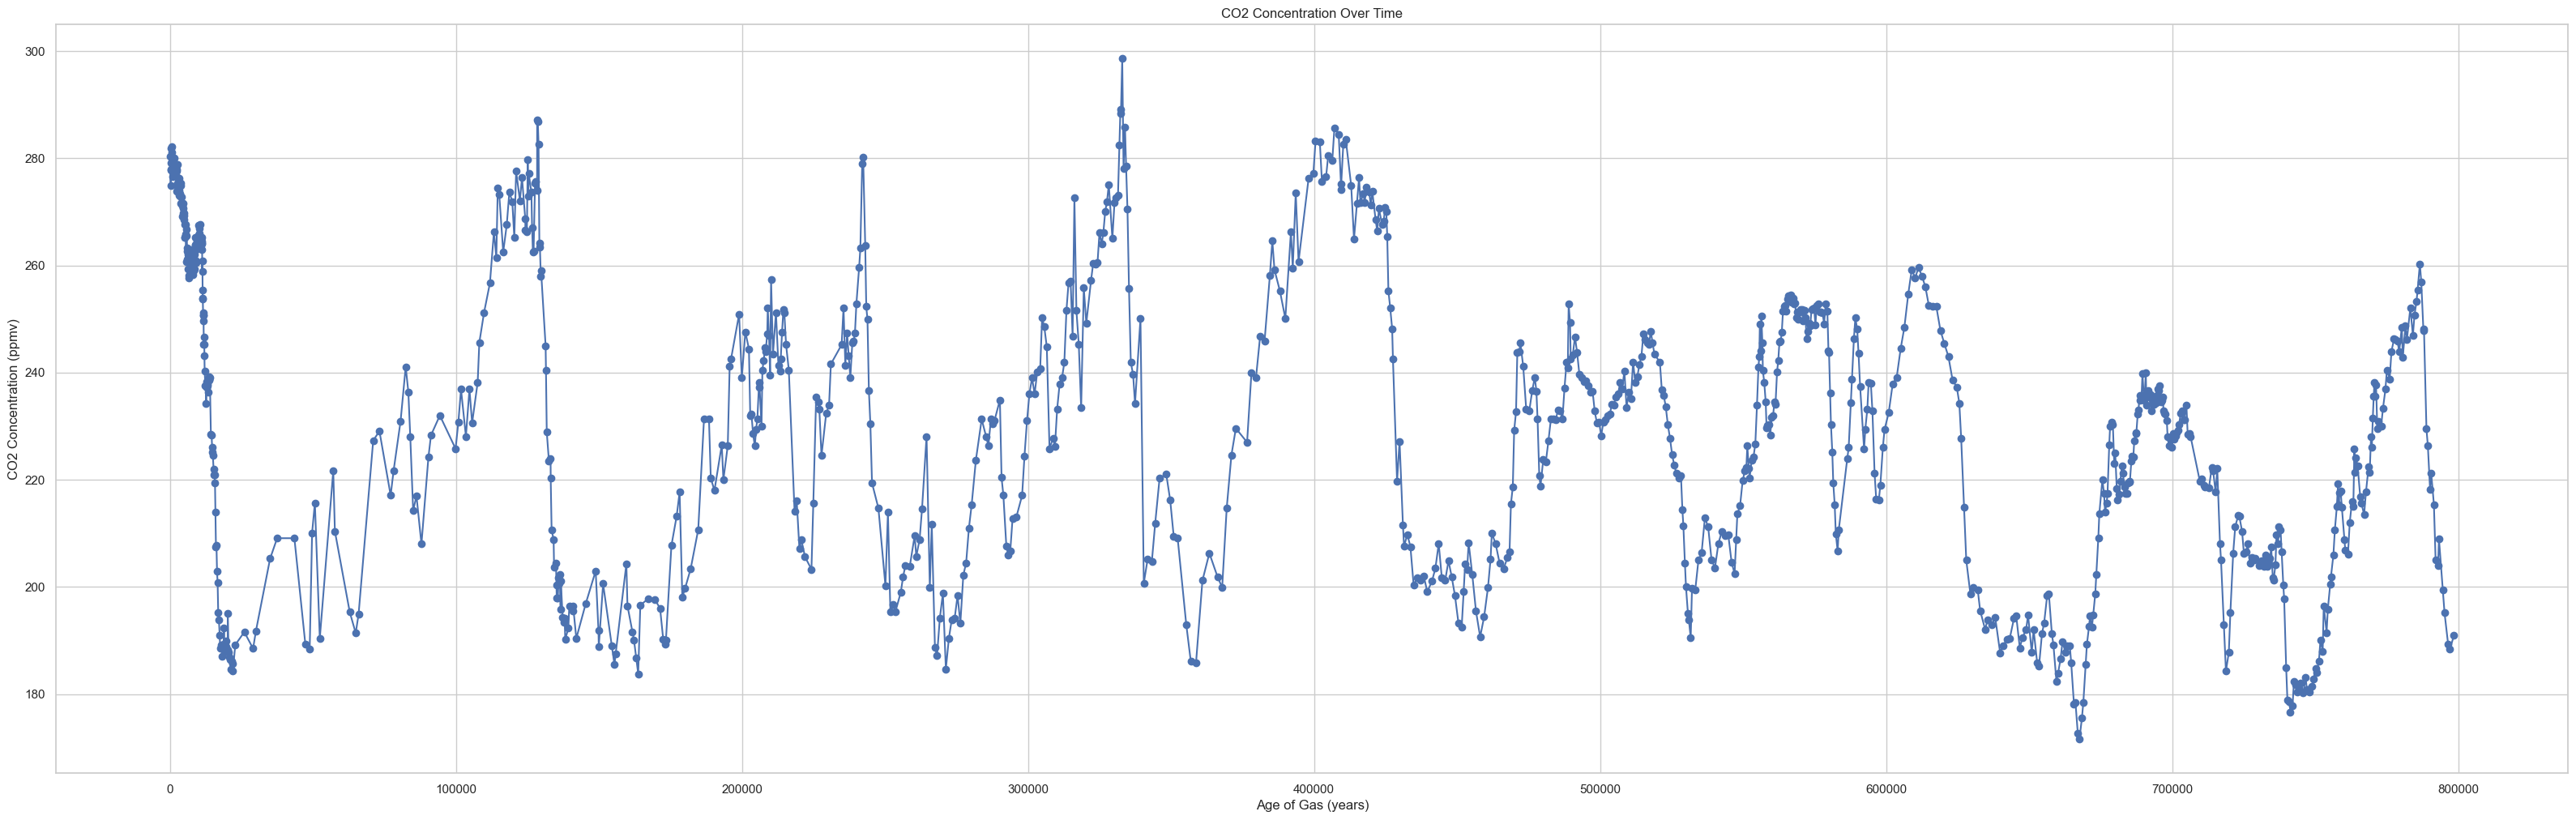

In [387]:
plt.figure(figsize=(40, 12))
plt.plot(df['Ice Core Gas Age'], df['CO2 (ppmv)'], marker='o', linestyle='-')
plt.xlabel('Age of Gas (years)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time')
plt.grid(True)
plt.show()

As the project progressed, I faced a number of issues in my lack of experience data cleaning. One of these was the fatc that the 'Temp Age' column was in float form and not in integer. With this I began to consider ways to convert the data. A way I had touched upon before was the '.astype' function of Pandas. I then applied this to the Data to rectify the issues. The data became easier to work with following this. 

Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/

In [388]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file
df = pd.read_excel('Temp Data.xlsx')
df.head()

# Convert columns to integers
df['Temp Age'] = df['Temp Age'].astype(int)

# Display the updated DataFrame
df.head()

,Temp Age,Temp
0,38,0.88
1,46,1.84
2,55,3.04
3,64,0.35
4,73,-0.42


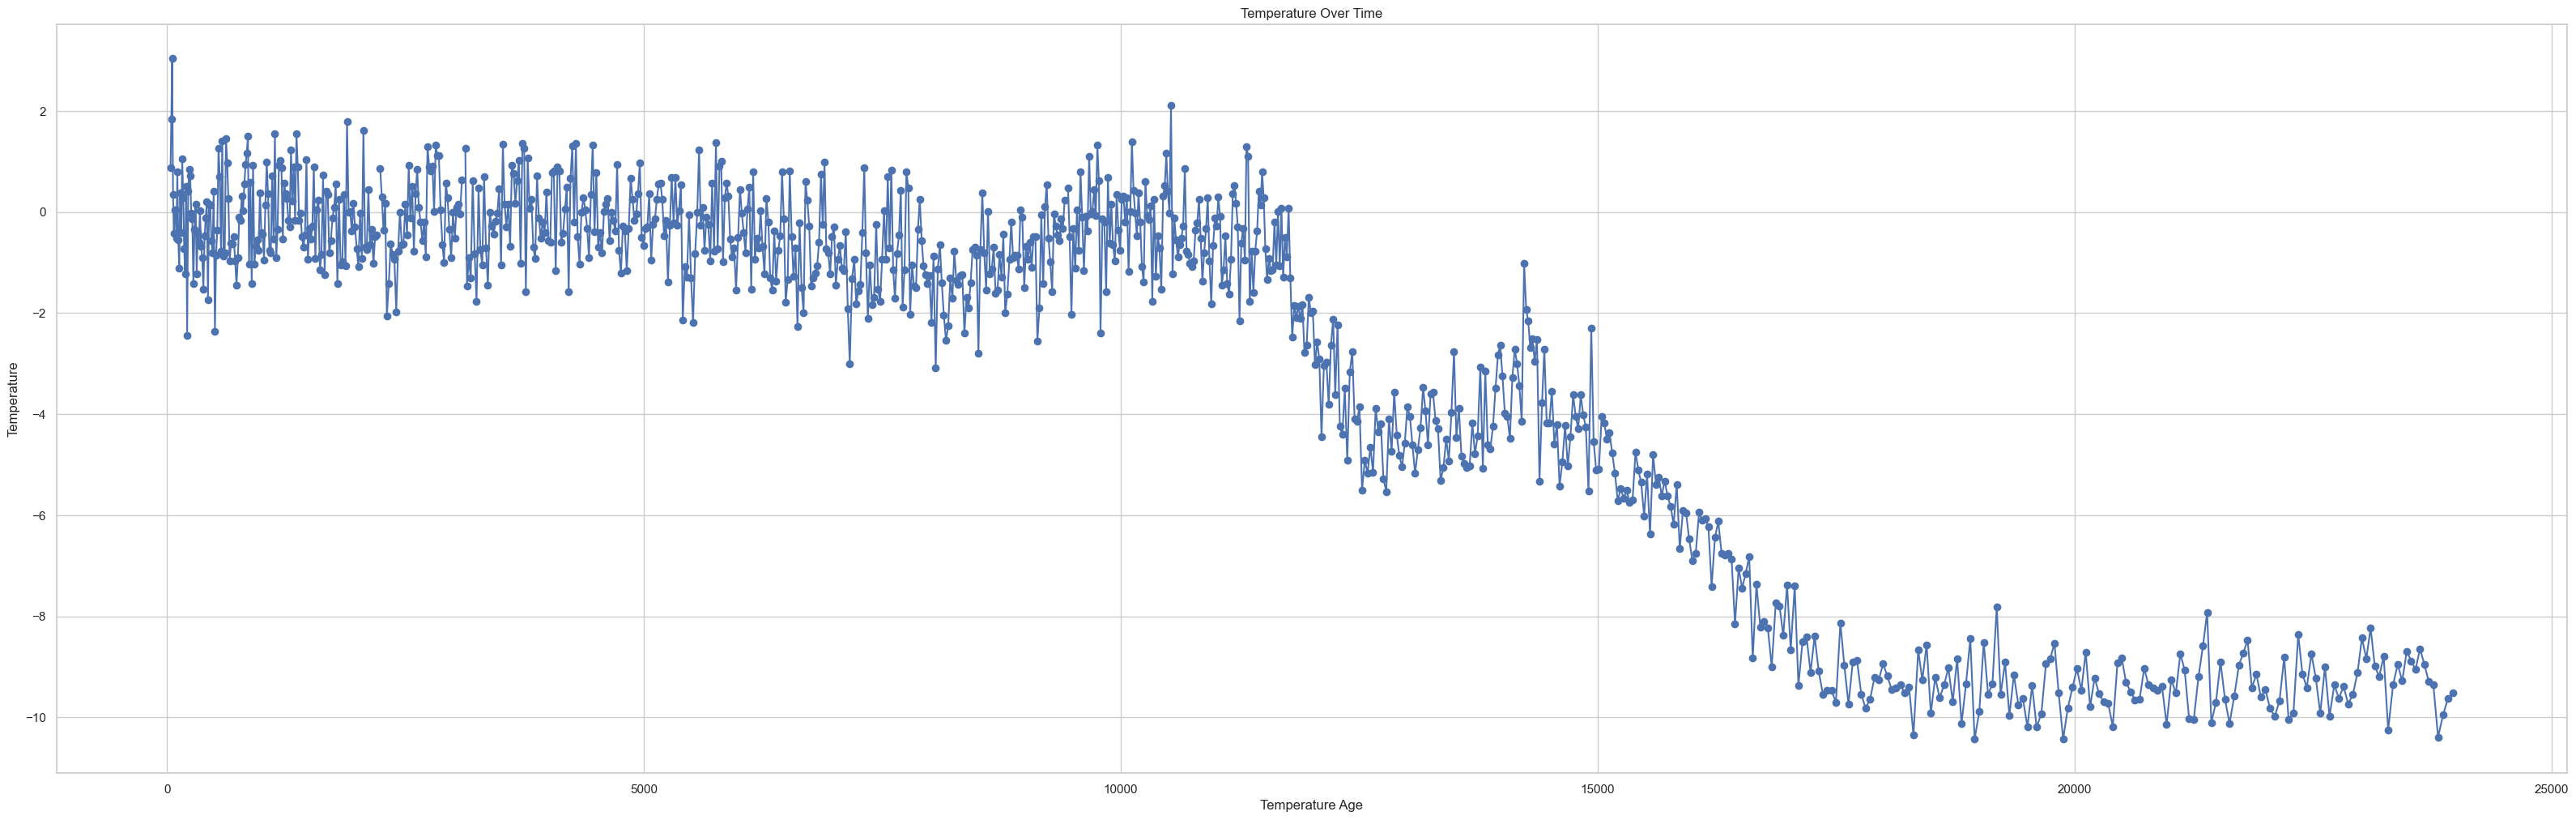

In [389]:
plt.figure(figsize=(40, 12))
plt.plot(df['Temp Age'], df['Temp'], marker='o', linestyle='-')
plt.xlabel('Temperature Age')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

Analysis of c02 vs Temperature Analysis

#### 2. Examination of one other (paleo/modern) feature (CH4)

After a number of attempts to load the data set from: https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt, I decided to try and skip the inital lines from the dataest. Before this I have tried to import it directly and python would not load the data correctly. I also tried, in a number of ways, to import the data into excel and it was putting the data into a single column and despite a number of efforts to import the data and transform it, it would not work. Finally, upon research I decided to try and use the orginal file but skip the opening introduction text until i reached the headings. Here I used 'skiprows=152' and printed the information. Once again, I had to keep going until I found the correct number (152). This so far has made the data usable. Please find the used code below, followed by the references. Much of this was also taught in the lectures throughout this course.

In [390]:
import pandas as pd

data_from_site = "https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt"

df = pd.read_fwf(data_from_site, skiprows=153, header=None)

print(df.head())

        0        1         2   3     4
0   Depth  Gas Age  CH4 mean  1s  Lab.
1   99.34       13       907  10     b
2  102.45      126       784  10     g
3  102.58      130       762  10     b
4  103.34      151       710  10     g


When initially trying to create this plot, I faced a number of issues. The foremost of these seemed to be the plots being unintelligable. I then left what I had done and began other sections of the project. I then returned to this as I wondered if I exported the data from the site to a csv would it read it more correctly and make the data more usable. This worked out as I used the following skeletons of code and previous learning to create the csv file. 

reference:

https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method-,The%20.,format%20for%20storing%20tabular%20data. 

https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_fwf.html

I once again imported the libraries needed for this section of code.

In [391]:
import pandas as pd
import matplotlib.pyplot as plt

Next I imported the ch4_data from a csv file. The Data required some cleaning as the heading appeared in the first two lines of code. 

In [392]:
#Data
file= 'ch4_data.csv'
df = pd.read_csv(file)

Here the columns are defined in order to plot the data correctly. 

In [393]:
#Columns
df.columns = ['Gas Age', 'CH4 Mean']

After considering other forms of displaying the data such as a scatterplot using staggered data entries and a boxplot doing the same, I once again decided to use a plot that contains a a high number of data points to best display the data.

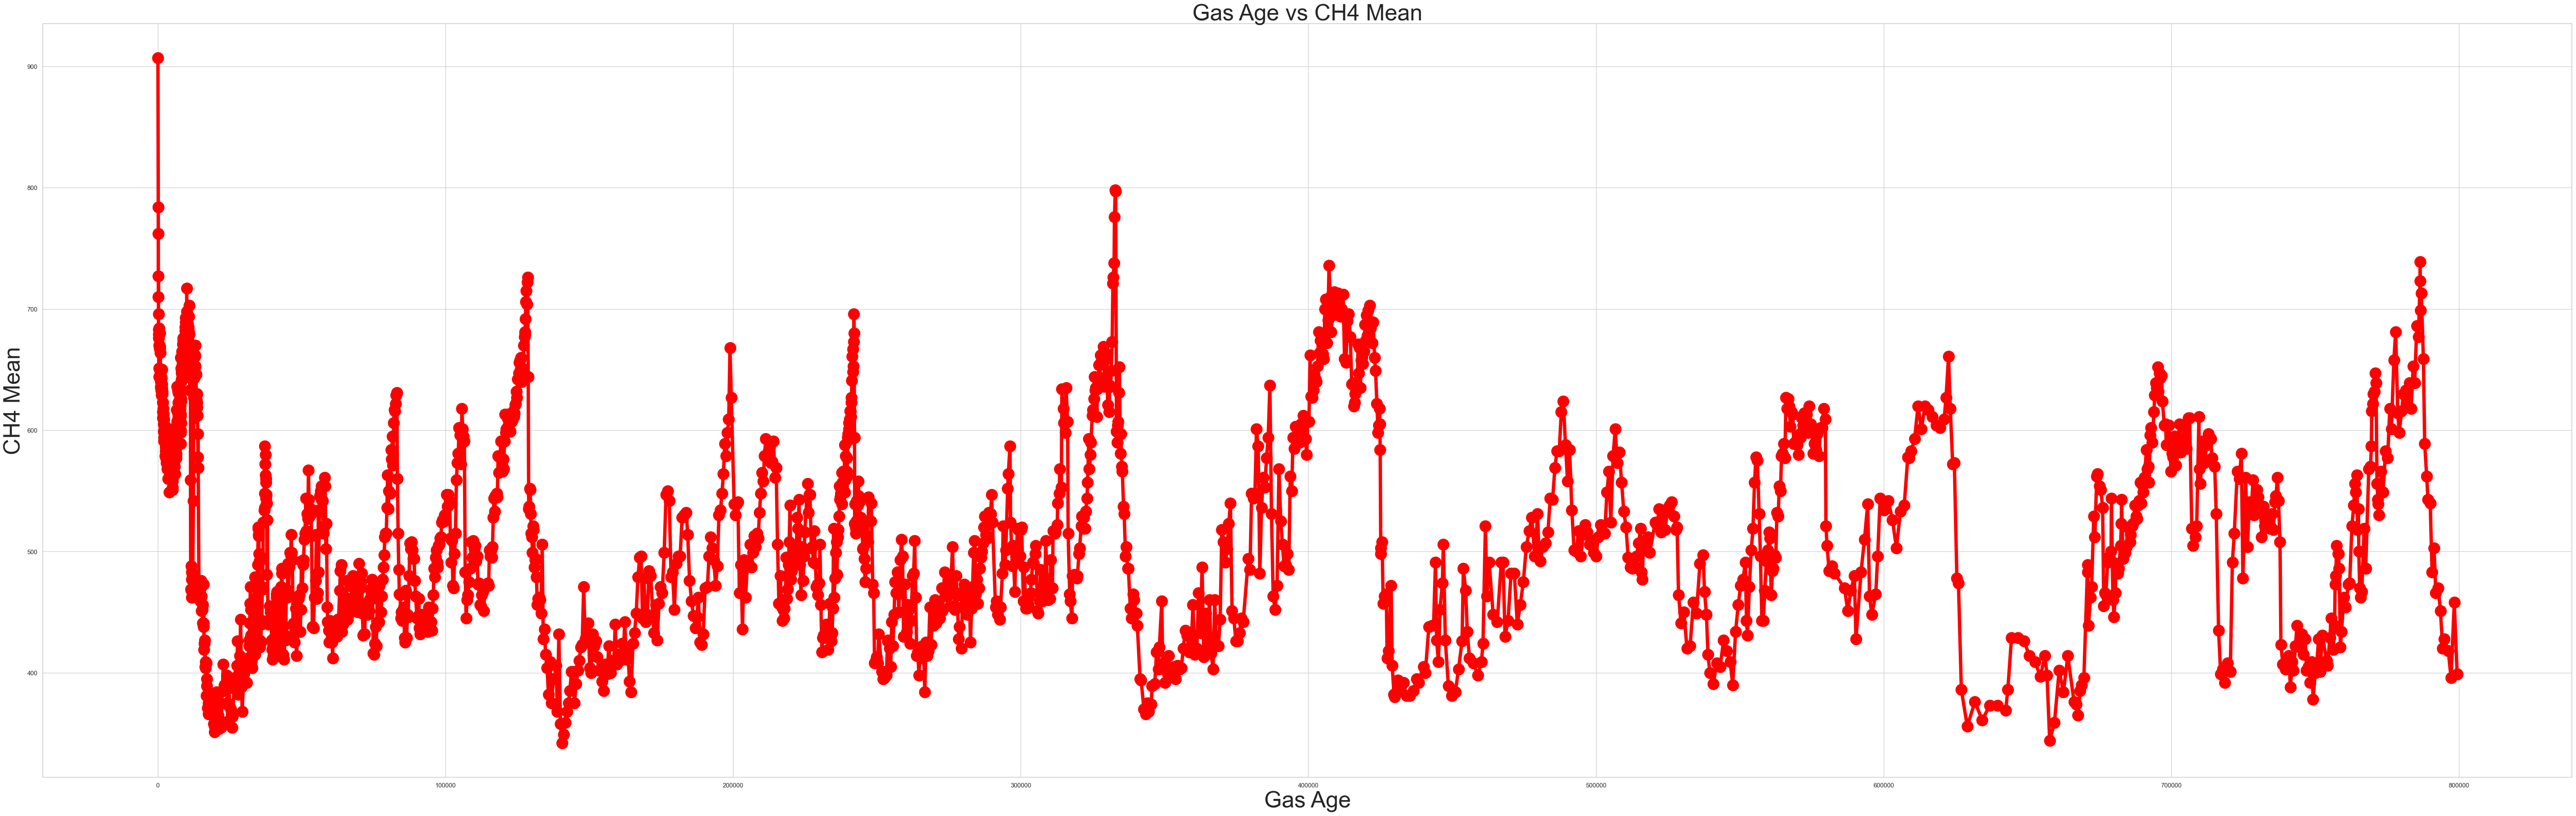

In [394]:
#Plot
plt.figure(figsize=(80, 24))
plt.plot(df['Gas Age'], df['CH4 Mean'], marker='o', markersize = 20, color='red', linestyle='-', linewidth=6)
plt.title('Gas Age vs CH4 Mean', fontsize=40)
plt.xlabel('Gas Age',fontsize=40)
plt.ylabel('CH4 Mean',fontsize=40)
plt.grid(True)
plt.show()

References: 

https://www.listendata.com/2017/02/import-data-in-python.html#:~:text=You%20don't%20need%20to,CSV%20files%20stored%20in%20URL)


https://stackoverflow.com/questions/49583256/skip-lines-in-a-text-file.&text=By%20specifying%20nrows%3D%20and%20usecols,number%20of%20rows%20and%20columns.  

#### 3: Examination of Irish context

For examining and Irish context, I took two seperate csv files, one titled 'Irish Data' which contains the irish temperature data over the past 100 or so years and 'Irish Emissions' whihc looks at c02, methane and nitrous oxide emissions over the past 100 years. The emissions data was pulled from a data set containing other countries. I cleaned the data for my purposes and the placed it together. Below are two plots, one which shows the Irish temperature anomoly and one which plots the gases. Both are shown over 121 years to show trends. 

The next section of code loads the necessary libraries and is followed a creation of a dataframe. It then displays the headings of the dataset, a practice I discovered to be vital when importing data as the column names need to be exact in order for the code to work. 

In [395]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Irish_Data.csv')
df.head()


,Irish year,Irish temp
0,1900,9.3
1,1901,9.1
2,1902,9.2
3,1903,9.1
4,1904,9.1


Next I added code to create information about the dataset in order to give an overview. I discuss these findings in the 'analysis' section found at the end of point 3. The first of these is 'Dataset' information:

In [396]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Irish year  123 non-null    int64  
 1   Irish temp  123 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB
None


Next I used df.describe to get statistics on the dataset: 

In [397]:
stats = df.describe()
print("\nSummary Statistics:")
print(stats)


Summary Statistics:
        Irish year  Irish temp
count   123.000000  123.000000
mean   1961.000000    9.728455
std      35.651087    0.503678
min    1900.000000    8.700000
25%    1930.500000    9.400000
50%    1961.000000    9.700000
75%    1991.500000   10.100000
max    2022.000000   10.900000


I then plotted the data using a scatterplot. I used a scatterplot to show the outliers. I also followed this by creating a plot to show the data more linearly in order to compare this to the emissions data that follows these plots.

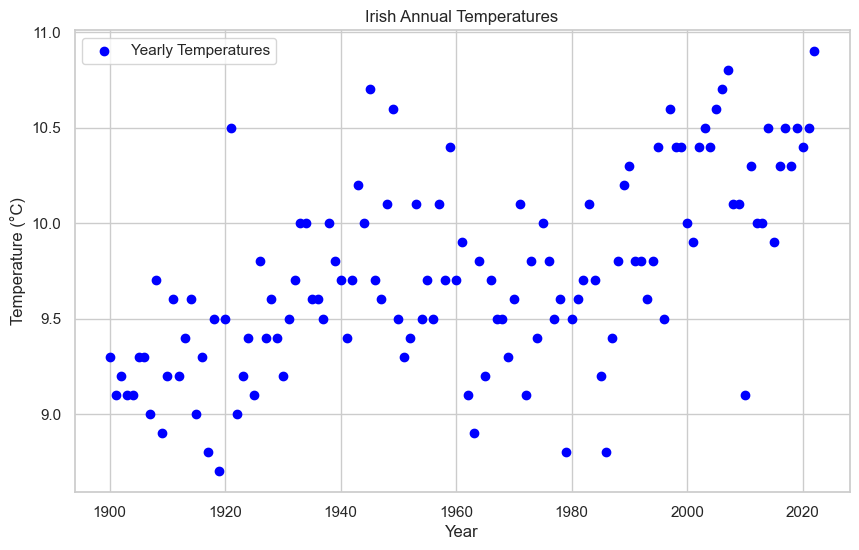

In [398]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Irish year'], df['Irish temp'], label='Yearly Temperatures', color='blue')
plt.title('Irish Annual Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


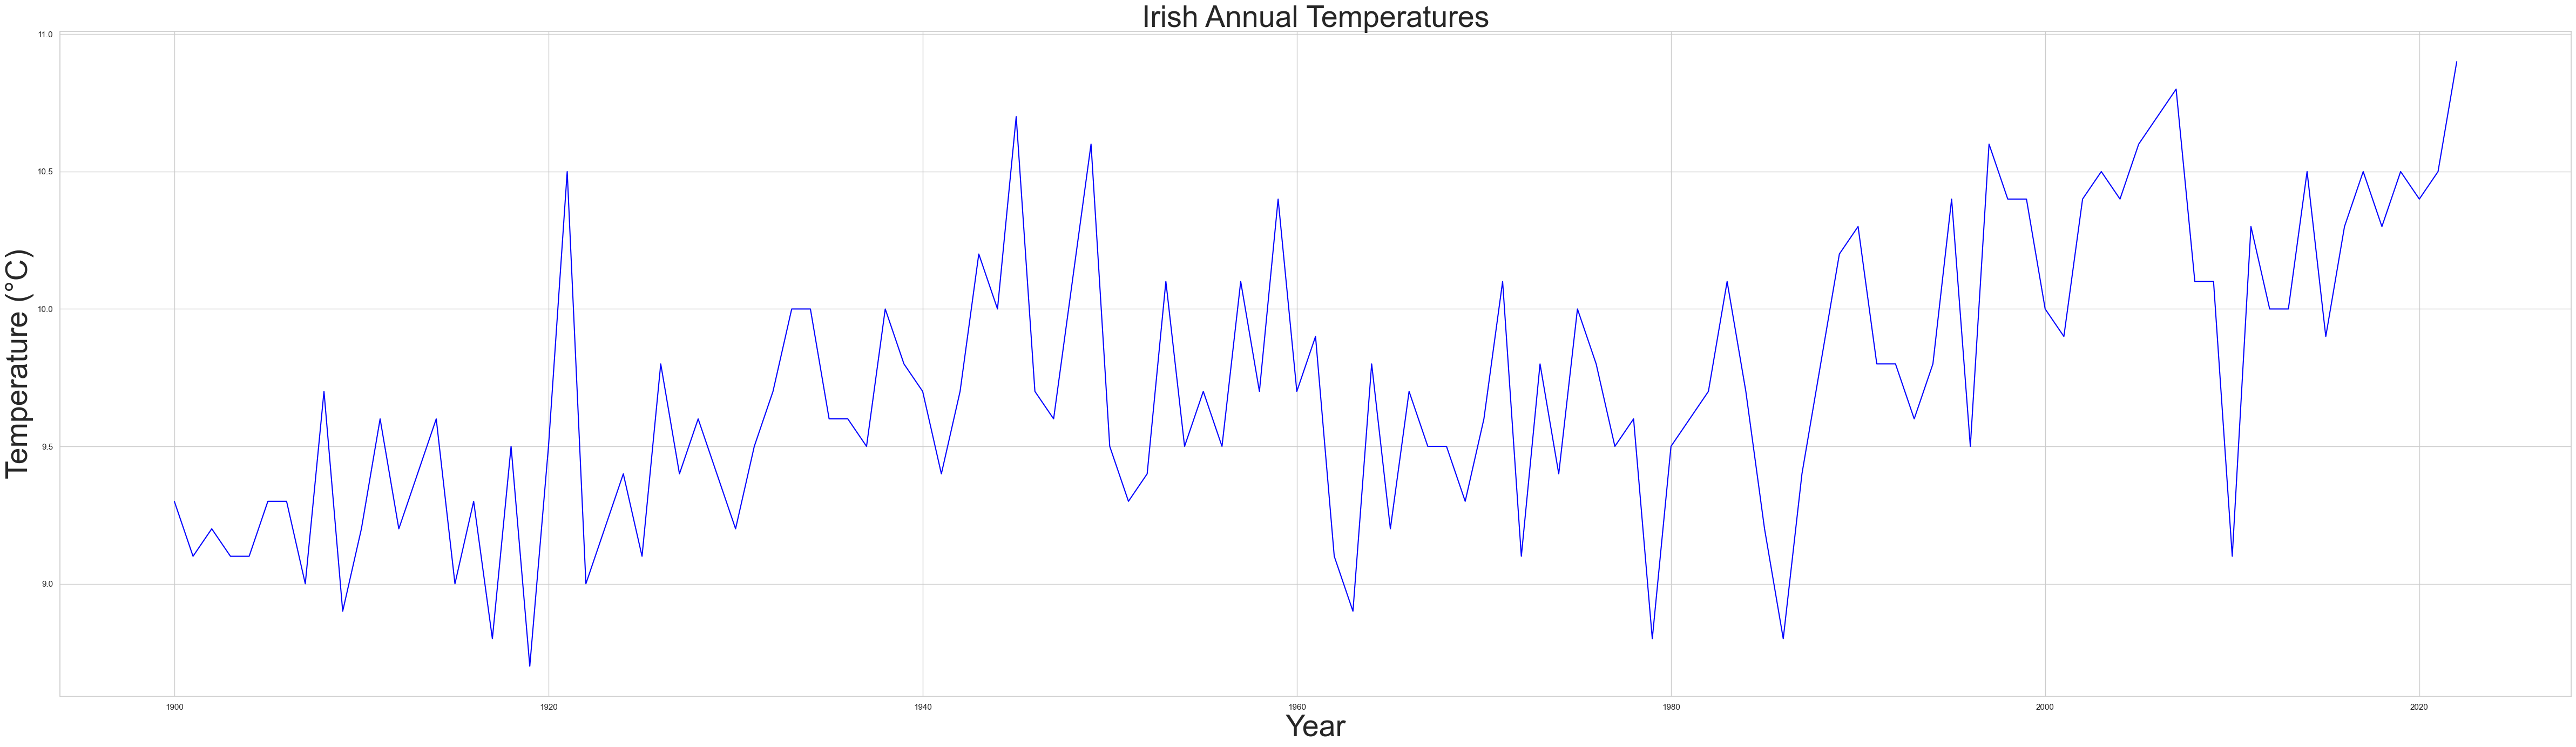

In [399]:
plt.figure(figsize=(60, 16))
plt.plot(df['Irish year'], df['Irish temp'], label='Yearly Temperatures', color='blue')
plt.title('Irish Annual Temperatures', fontsize=40)
plt.xlabel('Year',fontsize=40)
plt.ylabel('Temperature (°C)',fontsize=40)
plt.grid(True)
plt.show()

Following this I decided to ecplore the methane, c02 and nitrous oxide emissions along with the temperature anomoly in order to study, or confirm, the trends. I loaded in the data mentioned at the beginning of this session and once again displayed some of the data. 

In [400]:
df = pd.read_csv('Irish Emissions.csv')
df.head()

,Year,Nitrous oxide emissions,Annual methane emissions,Annual CO2 emissions
0,1900,1288602.0,25734202,-2112906.8
1,1901,1283737.8,25652976,-2051840.1
2,1902,1267520.2,25577564,-1856426.8
3,1903,1242784.2,25492832,-1856426.8
4,1904,1212365.1,25410988,-1514453.4


Next I examined and plotted this data using the following libraries. After doing research I found that using seaborn, using the references at the end of this section, was the best way in which to plot the data as I wanted to include all three pieces of data on the same plot to show the trends. 

In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next I once again created the necessary dataframe from the csv file in order to display the data. 

In [402]:
emissions_df = pd.read_csv('Irish Emissions.csv')

I then plotted the information, exactly like the temperature data, to get an overview of the data. This is analyse at the end of this section: 

In [403]:
print("Dataset Info:")
print(emissions_df.info())

stats = emissions_df.describe()
print("\nSummary Statistics:")
print(stats)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      122 non-null    int64  
 1   Nitrous oxide emissions   122 non-null    float64
 2   Annual methane emissions  122 non-null    int64  
 3   Annual CO2 emissions      122 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.9 KB
None

Summary Statistics:
              Year  Nitrous oxide emissions  Annual methane emissions   
count   122.000000             1.220000e+02              1.220000e+02  \
mean   1960.500000             5.319861e+06              1.839779e+07   
std      35.362409             3.404528e+06              3.872418e+06   
min    1900.000000             1.069263e+06              1.201356e+07   
25%    1930.250000             1.333742e+06              1.543537e+07   
50%    1960.500000             5.64705

Following this, based on the code from the last reference given, I created the seaborn lineplots. First the code sets the seaborn style:

In [404]:
sns.set(style="whitegrid")

Next the lineplots are created with each variable of data being used across the same timeline in order to plot the trends. 

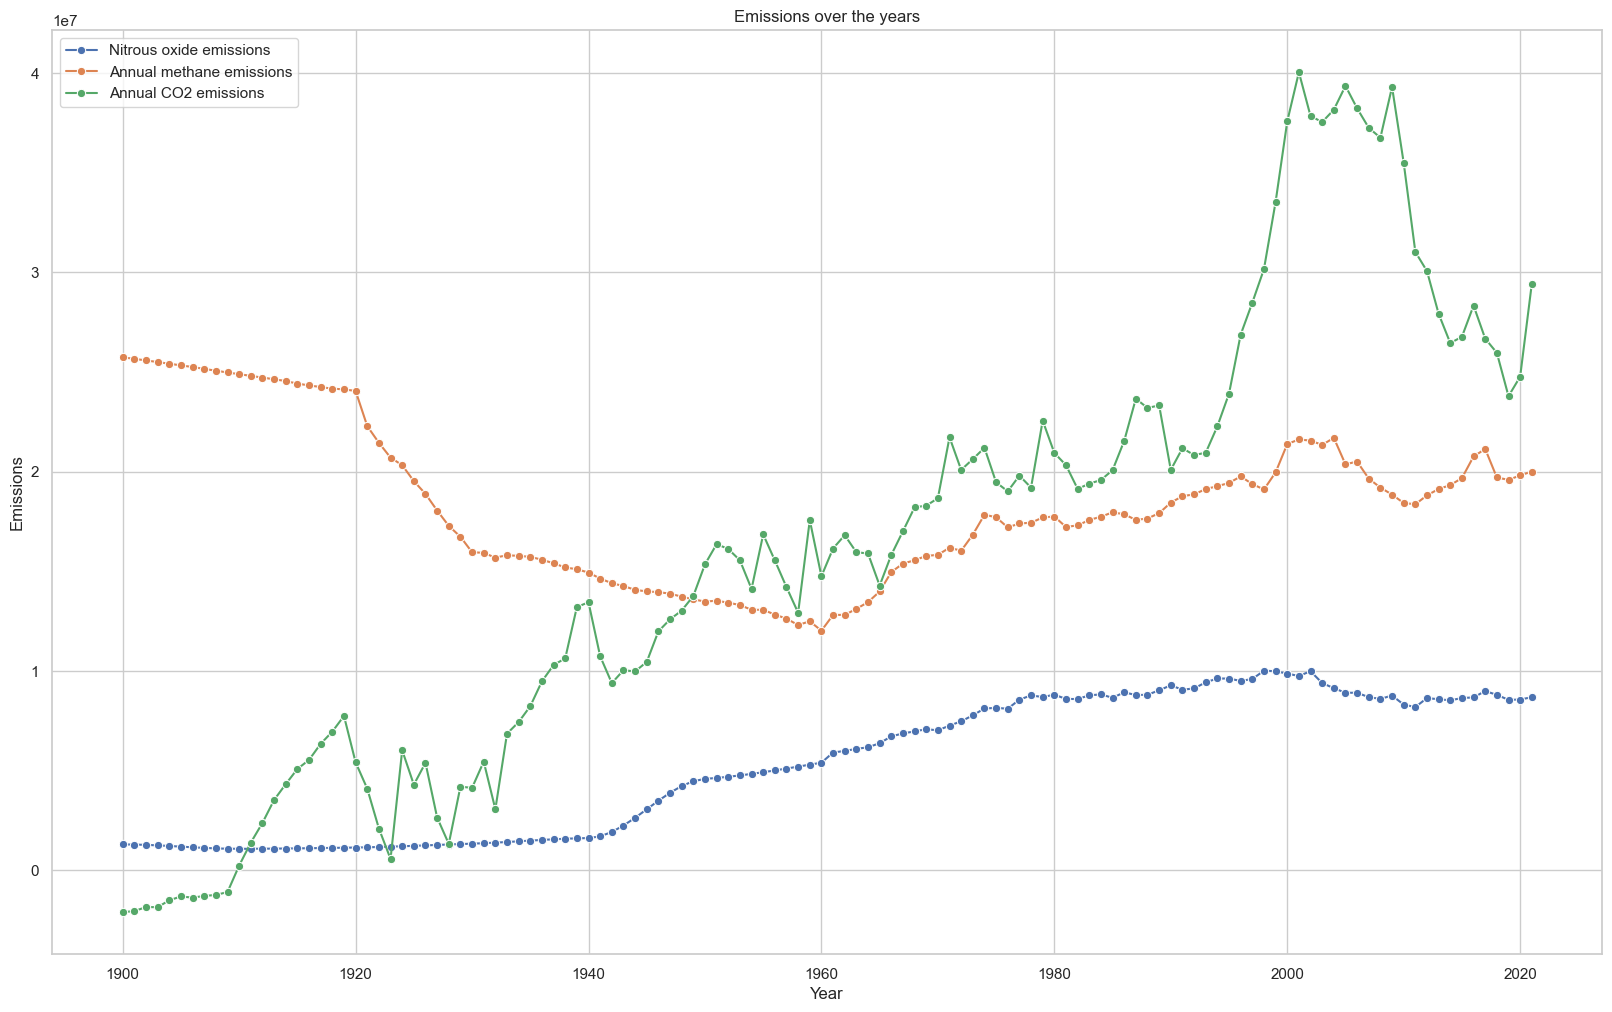

In [405]:
plt.figure(figsize=(20, 12))
sns.lineplot(x='Year', y='Nitrous oxide emissions', data=emissions_df, marker='o', label='Nitrous oxide emissions')
sns.lineplot(x='Year', y='Annual methane emissions', data=emissions_df, marker='o', label='Annual methane emissions')
sns.lineplot(x='Year', y='Annual CO2 emissions', data=emissions_df, marker='o', label='Annual CO2 emissions')

plt.title('Emissions over the years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

Analysis

When analysing the data there are a number of interesting facts to discuss.

Temperature
The temperatures range is from 8.7 to 10.9 degrees with a fluctuation in temperatures over the years. Also the temperature has generally been above 9 degrees in recent decades,and has been rising, despite a number of fluctuations and outlier.

Emissions
The analysis of the emissions data shows trends in nitrous oxide, methane, and carbon dioxide emissions. Nitrous oxide emissions shows an overall increasing trend with some fluctuations. It spikes around the 1970s and continues spiking until the 1990s. In contrast, annual methane emissions shows a more consistent growth without sharp, showing a steady rise over the years. Carbon dioxide emissions show a continuous increase. This data coincides with the rise in temperature.

References used: https://repository.library.noaa.gov/view/noaa/48993/noaa_48993_DS1.pdf

https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647

https://stackoverflow.com/questions/22483588/how-to-plot-multiple-dataframes-in-subplots#:~:text=You%20can%20manually%20create%20the,plt%20fig%2C%20axes%20%3D%20plt.

https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial 



#### 4: Fusing and analysing of Data with it being exported to csv and json formats

Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats

My plan here requires a number of different steps and took a number of consdierations to complete. I first consdidered what data I wanted to put in the dataframe. I decided on global C02, global temperature, Irish temperature and Irish C02 all since 1960. This required more data and a number of cleaning issues I had to perform. I needed to remove columns, create a common timeline, rename columns and export the columns to the formats mentioned. 

With this, I first imported the libraries needed:

In [406]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next I loaded in the data needed and create new dataframes to store the data for easier access in the latter part of the code. This data was much easier to alter than the ice core data as there are not as many datapoints and a common timeline between all data (yearly).

In [407]:
co2_data = pd.read_csv('latest c02.csv')
temp_data = pd.read_csv('global temperature anomaly.csv')
irish_data = pd.read_csv('Irish_Data.csv')
Irish_Emissions = pd.read_csv('Irish Emissions.csv')

To merge the Data after a number of various attempts and problems to overcome regarding the column names, I ended up finding that I needed to merge the Data based on their indexes using 'pd.concat'. This made the process easier but once again column name became an issue when exporting the data. 

In [408]:
merged_df = pd.concat([co2_data, temp_data, Irish_Emissions, irish_data], axis=1)

Now I once again describe the dataset to see the headings. There are three columns with the title 'Year' and later when I went to export this it created a problem. a need to remove the unneccessary columns arose so i began the process of create a merged dataframe again with the new parameters.

In [409]:
merged_df.head()

,year,mean,Year,Global average temperature anomaly,Year,Nitrous oxide emissions,Annual methane emissions,Annual CO2 emissions,Irish year,Irish temp
0,NaN,NaN,1900,-0.234479,1900.0,1288602.0,25734202.0,-2112906.8,1900.0,9.3
1,NaN,NaN,1901,-0.293429,1901.0,1283737.8,25652976.0,-2051840.1,1901.0,9.1
2,NaN,NaN,1902,-0.438984,1902.0,1267520.2,25577564.0,-1856426.8,1902.0,9.2
3,NaN,NaN,1903,-0.533326,1903.0,1242784.2,25492832.0,-1856426.8,1903.0,9.1
4,NaN,NaN,1904,-0.597561,1904.0,1212365.1,25410988.0,-1514453.4,1904.0,9.1


In [410]:
#Concatenate Data
merged_df = pd.concat([co2_data, temp_data, Irish_Emissions, irish_data], axis=1)

#Drop Columns
drop = ['Year', 'Nitrous oxide emissions', 'Annual methane emissions', 'Irish year'] 
merged_df = merged_df.drop(columns=drop, errors='ignore')


In [411]:
merged_df.head()

,year,mean,Global average temperature anomaly,Annual CO2 emissions,Irish temp
0,NaN,NaN,-0.234479,-2112906.8,9.3
1,NaN,NaN,-0.293429,-2051840.1,9.1
2,NaN,NaN,-0.438984,-1856426.8,9.2
3,NaN,NaN,-0.533326,-1856426.8,9.1
4,NaN,NaN,-0.597561,-1514453.4,9.1


Following this I now need to create a common year for the data as 'Annual C02 emissions' only begins at 1959. Using the reference given at the end of this section to filter from a specific date in a dataset, I used the following code to achieve what I wanted i.e. each index going from the year 1960. This also required further altering the csv file, as I could not get the data presented how I wanted I could not find an in code solution at this time. I applied NaN values to the data until they lined up with the other codes.

In [412]:
merged_df = merged_df[merged_df['year'] >= 1960]

Once again, I printed the indexes.

In [413]:
merged_df.head()

,year,mean,Global average temperature anomaly,Annual CO2 emissions,Irish temp
60,1960.0,316.91,-0.115487,14747042.0,9.7
61,1961.0,317.64,-0.019997,16138734.0,9.9
62,1962.0,318.45,-0.064054,16807372.0,9.1
63,1963.0,318.99,-0.036806,15951037.0,8.9
64,1964.0,319.62,-0.305867,15889289.0,9.8


Finally after cleaning the data to my preferences, I used the following code to export the data. The first export the file to csv format and the latter exports the file to JSON format for easier analysis. 

In [414]:
#CSV
merged_df.to_csv('merged_data.csv', index=False)

#JSON
merged_df.to_json('merged_data.json', orient='records')

Analysis of Dataframe

The dataset is from 1960 to 2023 with 64 data points and shows global, and national, environmental indicators. The mean global average CO2 concentration stands at 359.9 ppm, showing some variablilty. Global temperature anomalies display  a mean of 0.30 degrees and a standard deviation of 0.35 degrees, with a number of fluctuations. Annual CO2 emissions vary, with a mean of approximately 24.89 million metric tons and a standard deviation of 7.42 million metric tons, ranging from 14.28 to 40.04 million metric tons. In contrast, Irish temperatures demonstrate less fluctuations, with a mean of around 9.9 degrees and a standard deviation of 0.51 degrees. Below s the code used earlier in this project applied here.

In [415]:
print("Dataset Info:")
print(merged_df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 60 to 123
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 64 non-null     float64
 1   mean                                 64 non-null     float64
 2   Global average temperature anomaly   64 non-null     float64
 3   Annual CO2 emissions                 62 non-null     float64
 4   Irish temp                           63 non-null     float64
dtypes: float64(5)
memory usage: 5.1 KB
None


In [416]:
stats = merged_df.describe()
print("\nSummary Statistics:")
print(stats)


Summary Statistics:
              year        mean  Global average temperature anomaly    
count    64.000000   64.000000                            64.000000  \
mean   1991.500000  359.935625                             0.296810   
std      18.618987   31.089814                             0.349122   
min    1960.000000  316.910000                            -0.305867   
25%    1975.750000  331.805000                            -0.001058   
50%    1991.500000  356.120000                             0.263351   
75%    2007.250000  384.472500                             0.577389   
max    2023.000000  421.080000                             0.996559   

       Annual CO2 emissions  Irish temp  
count          6.200000e+01   63.000000  
mean           2.489307e+07    9.898413  
std            7.421076e+06    0.511636  
min            1.427924e+07    8.800000  
25%            1.948815e+07    9.550000  
50%            2.241249e+07    9.900000  
75%            2.918197e+07   10.350000  
max

References: 

https://www.w3schools.com/python/pandas/ref_df_merge.asp 

https://pandas.pydata.org/docs/user_guide/merging.html

https://edcarp.github.io/python-intermediate-esces/06-merging-data/index.html 

https://stackoverflow.com/questions/72192394/how-to-export-very-large-merged-dataframe 

https://datacarpentry.org/python-ecology-lesson/05-merging-data.html

https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

https://sparkbyexamples.com/pandas/pandas-filter-dataframe-rows-on-dates/?utm_content=cmp-true

#### Bullet point 5

#### 5: Analysis of the data, the trends and the relationships between them.

This next section takes the data collected and fused in the last section and sets to analyse the data and to spot and discuss the trends and relationships with the data. Once again, as the data is over a smaller period of time, it has been much easier to manipulate and display. I considered how to plot the data and I decided to use plots I was familiar with but also how best display the data. 

1. I used matplotlib.pyplot to display the global temperature anomoly. The growing trend is easily identifieable here with a consistant rise throughout.

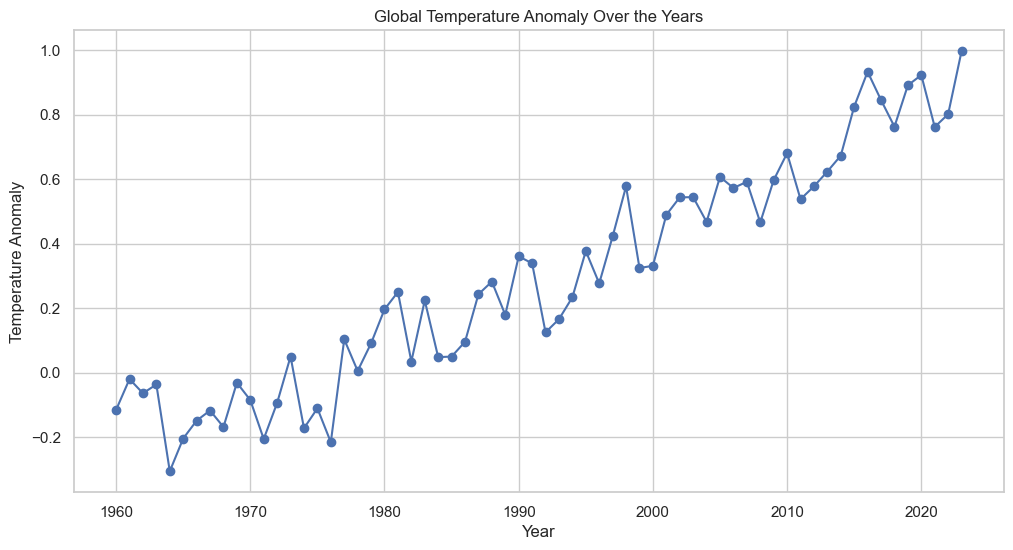

In [417]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['Global average temperature anomaly '], marker='o')
plt.title('Global Temperature Anomaly Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.grid(True)
plt.show()


2. I performed the same process here in order to study the C02 emissions. Here we see c02 emissions rising until 2010 when emissions fell off possibly to climate change actions being undertaken.

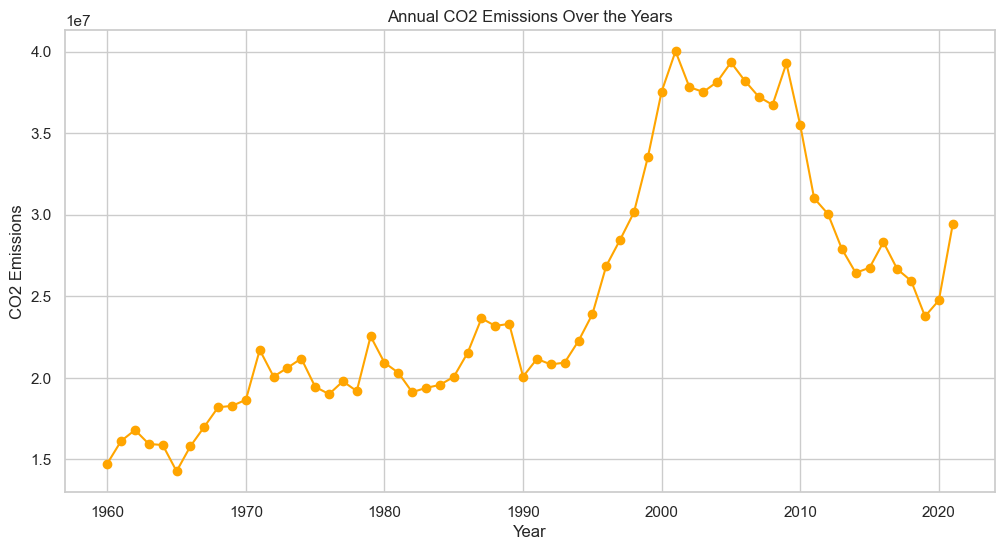

In [418]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['Annual CO2 emissions'], marker='o', color='orange')
plt.title('Annual CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()

3. I once again plotted Irish temperature. Again we see somewhat of a rise but, unlike the global levels, the temperature fluctuate within a lower range.

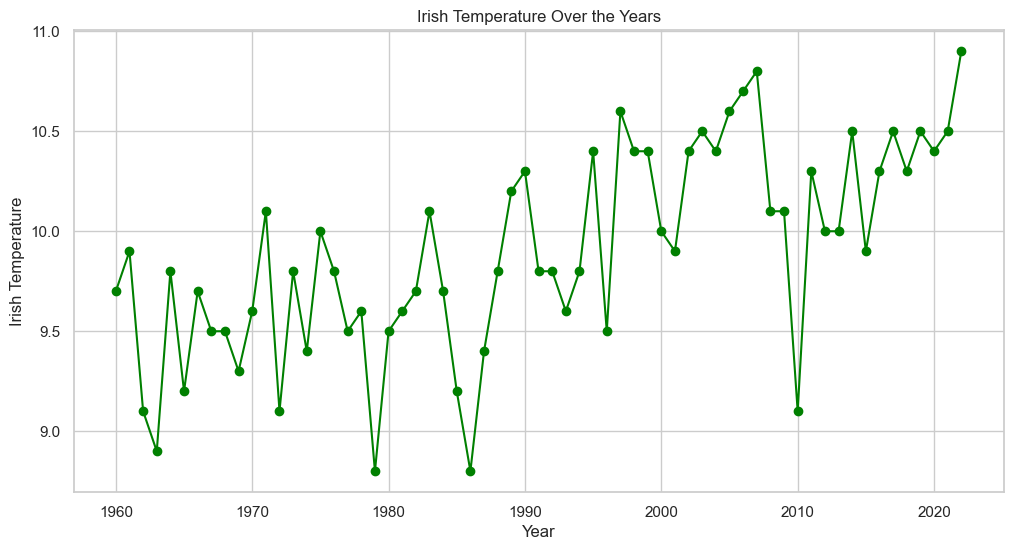

In [419]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['Irish temp'], marker='o', color='green')
plt.title('Irish Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Irish Temperature')
plt.grid(True)
plt.show()


4. I then created a pairplot using the seaborn library. This shows a number of different analysis of the data mostly using scatterplots and histograms. when looking at the plots, they show consistant rising on most fronts with c02 emissions decreasing in recent years. This all points to the climatal issues. 

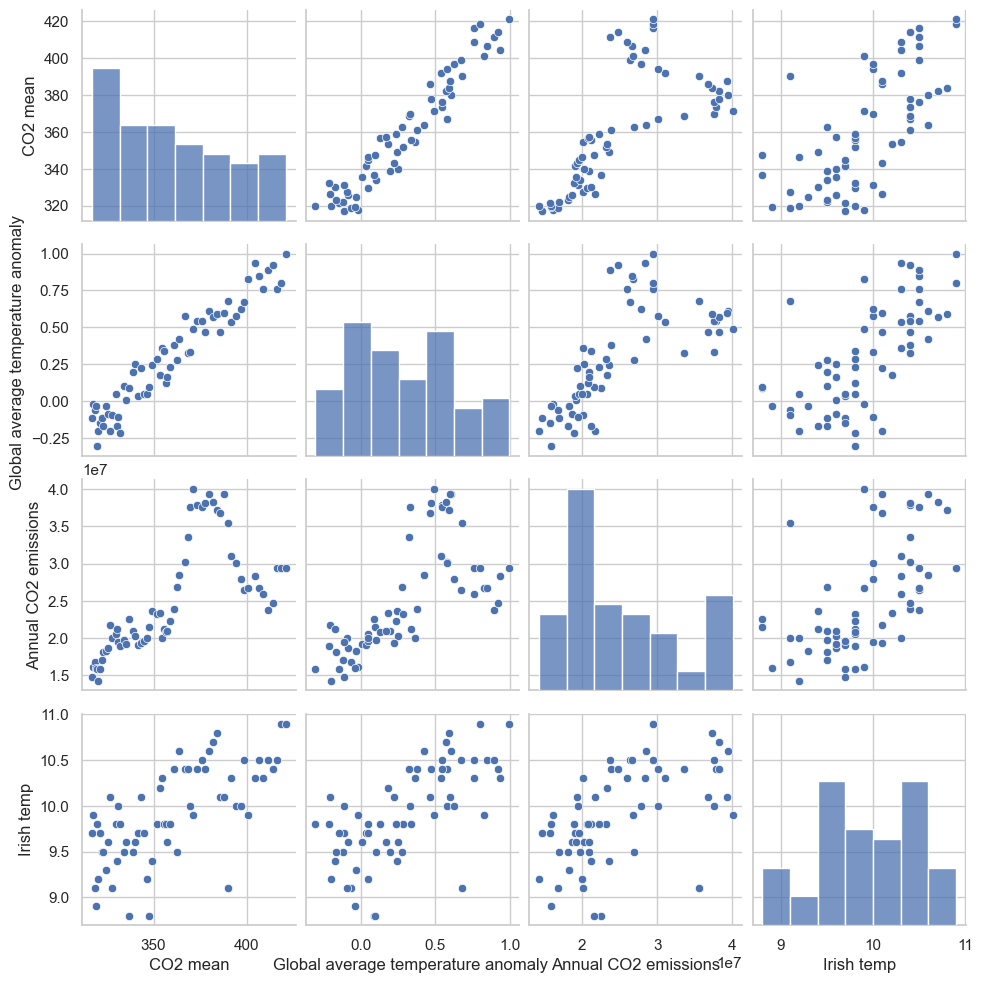

In [438]:

import seaborn as sns
import matplotlib.pyplot as plt

merged_df.rename(columns={'mean': 'CO2 mean'}, inplace=True)

sns.pairplot(merged_df[['CO2 mean', 'Global average temperature anomaly ', 'Annual CO2 emissions', 'Irish temp']])
plt.show()


5. Similarily to code used earlier in the project, I tried to create a plot containing all of the columns found in the merged data frame. It would not plot the data and I believe this is due to a few issues I currently cannot resolve (float numbers, minus numbers and missing values).

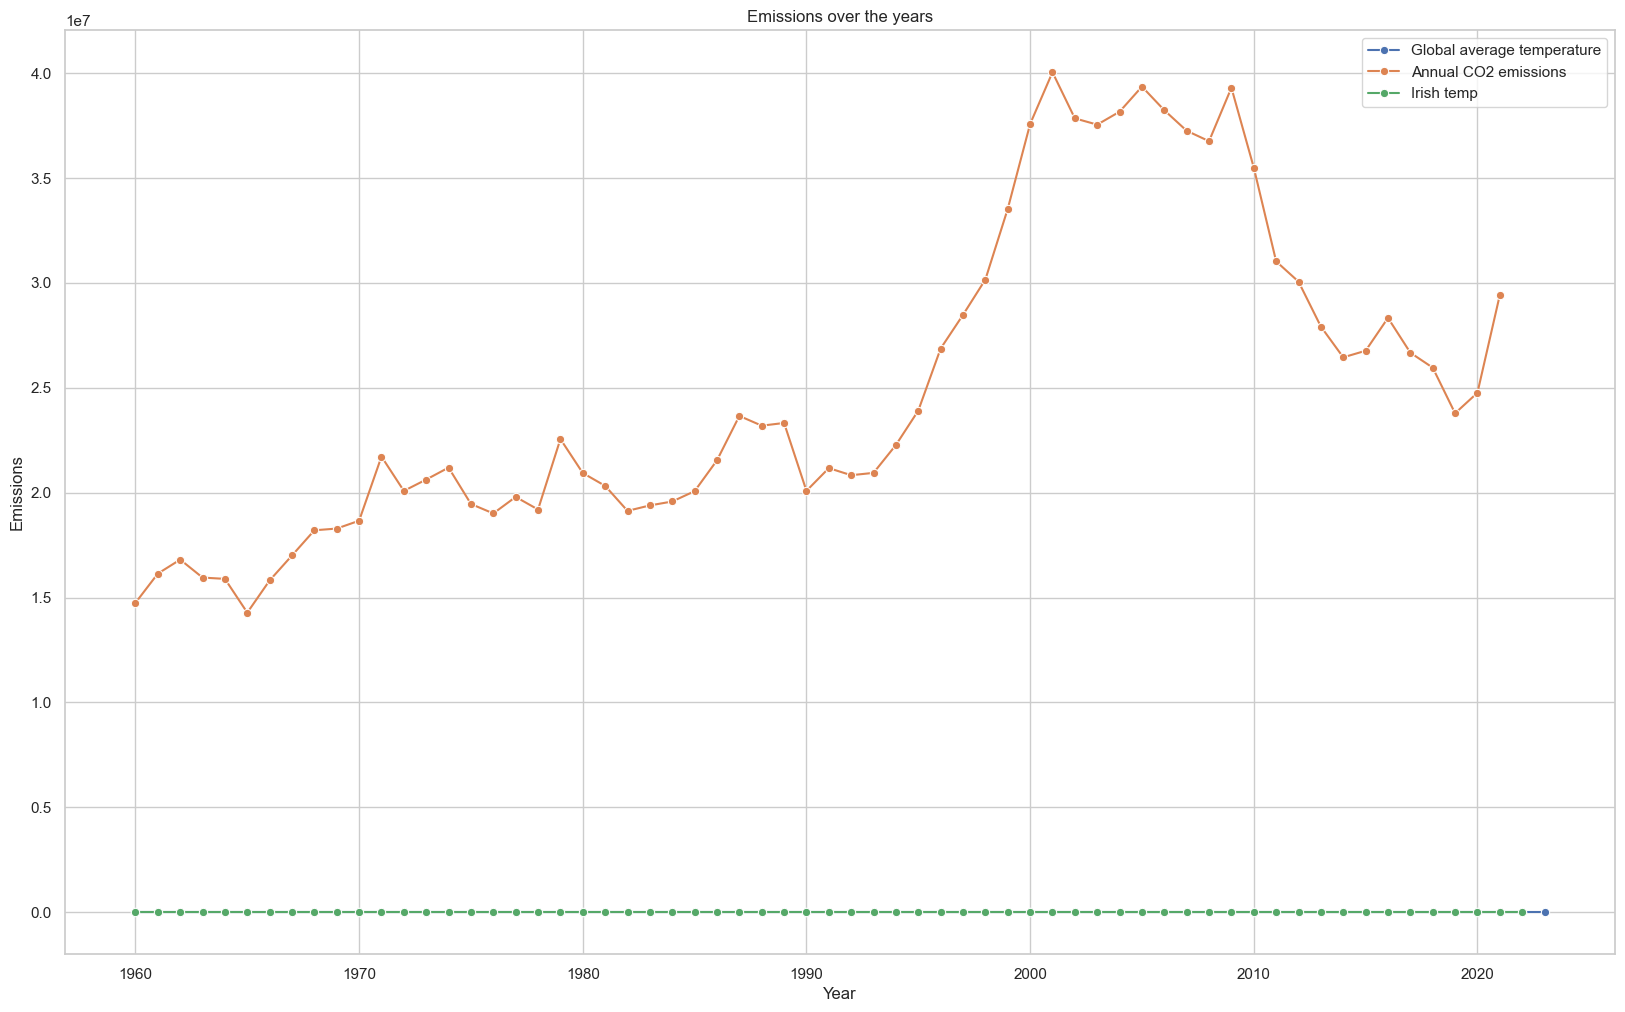

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

merged_df = pd.read_csv('merged_data.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(20, 12))
sns.lineplot(x='year', y='Global average temperature anomaly ', data=merged_df, marker='o', label='Global average temperature')
sns.lineplot(x='year', y='Annual CO2 emissions', data=merged_df, marker='o', label='Annual CO2 emissions')
sns.lineplot(x='year', y='Irish temp', data=merged_df, marker='o', label='Irish temp')

plt.title('Emissions over the years')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()



Conclusion

In conclusion the data gathered supports the data previously studied in this project in showing a rise in temperature due to the rise in gases.

References used: 

https://www.w3schools.com/python/pandas/ref_df_merge.asp 

https://pandas.pydata.org/docs/user_guide/merging.html

https://edcarp.github.io/python-intermediate-esces/06-merging-data/index.html 

https://stackoverflow.com/questions/72192394/how-to-export-very-large-merged-dataframe 

https://datacarpentry.org/python-ecology-lesson/05-merging-data.html

https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.

https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

https://chem.libretexts.org/Courses/Lumen_Learning/Book%3A_Microeconomics-1_(Lumen)/03%3A_1-_Economic_Thinking/3.08%3A_Reading-_Interpreting_Slope

#### 6: Prediction global temperature anomaly over next few decades using synthesised data and comparison of this published climate models if atmospheric CO2 trends continue.


Skeleton to be used for code in this section: https://valueml.com/global-warming-prediction-using-machine-learning-in-python/

References: 

https://cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

https://www.machinelearningnuggets.com/python-linear-regression/#models-provided-by-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.machinelearningnuggets.com/python-linear-regression/#models-provided-by-scikit-learn

https://pandas.pydata.org/docs/user_guide/merging.html

https://datatofish.com/dropna/

https://stackoverflow.com/questions/34693079/how-to-interpolate-missing-data-in-a-dataframe

https://realpython.com/linear-regression-in-python/ 

https://www.w3schools.com/python/python_ml_linear_regression.asp 

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html

https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756

https://www.educative.io/blog/machine-learning-regression-models-with-python

https://github.com/chinmaydas96/Monitoring-Global-Warming-with-Linear-Regression/blob/master/Global%2Bwarming.py 

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html

#### 7: Comments on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

Climate change is a huge concern in today’s modern world with conscientious living needed the world over and a global concern rising but maybe not at the degree it should be. The world is constantly heading in the wrong direction when it comes to global warming figures with c02 emissions rising consistently and may continue to rise if predictions come to fruition, as seen throughout this project.


Surface temperatures are rising consistently and there has been a notable increase in warming the world over due to a surge of Greenhouse gases, in particular Carbon Dioxide and methane, which trap heat in the atmosphere. With this the rising heat is melting the ice landscapes found throughout the world which are raising the sea levels impacting people, landscapes and ecosystems the world over. Due to the rising sea levels weather patterns are also changing.
The International Energy Agency (IEA) released a report on global CO2 emissions for 2022, revealing a number of trends. In the face of energy price rises, rising inflation, and disruptions in traditional fuel trade flows, global energy-related CO2 emissions experienced a growth of 0.9%, reaching 36.8 Gt which was lower than the 6% rebound observed in 2021. Clean energy technologies, including renewables, electric vehicles, and heat pumps, played a crucial role, preventing an additional 550 Mt in CO2 emissions. However, extreme weather impacting cooling and heating demand and nuclear power plants being offline, contributed to the overall emission growth.


The breakdown of emission sources reveals a number of patterns, with emissions from natural gas shown to be declining while those from coal production reached a new high. Renewable energy limited offset the coal power emissions somewhat. The electricity and heat generation sector saw the most significant increase in emissions, driven by emerging economies in Asia. China's emissions remaining relatively flat, the European Union experienced a reduction and the United States witnessed growth in emissions from the buildings sector but reductions in electricity and heat generation. 
The very latest features I could find in Ireland show that there is a 1.9% increase in greenhouse gas but a total national emission decrease by 1.8%. Transport, waste and commercial services showed an increase while other decreased as per capita emissions dropped from 12.4 to 11.9 tones of co2eq/person in 2022. This will lead to a 10% reduction by 2030, falling short of the 42% reduction target. Ireland experienced an overall increase of 9.2% in GHG emissions from 1990 to 2022. CO2, CH4, and N2O contribute 60.4%, 29.0%, and 9.4%, respectively, to total emissions in 2022. Agriculture remains the largest contributor at 38.4%, and is followed by transport, energy industries, and the residential sector.
In conclusion, although it appears there are a number of offsets to the rising global temperature the projected growth and trends point that emissions will still rise over the coming years.


References:

https://www.scirp.org/journal/paperinformation?paperid=86337 

https://iea.blob.core.windows.net/assets/3c8fa115-35c4-4474-b237-1b00424c8844/CO2Emissionsin2022.pdf

https://www.epa.ie/our-services/monitoring--assessment/climate-change/ghg/latest-emissions-data/


#### Bibliography


1. "Dataframe to CSV: How to Save Pandas Dataframes by Exporting" - FreeCodeCamp
   (https://www.freecodecamp.org/news/dataframe-to-csv-how-to-save-pandas-dataframes-by-exporting/#:~:text=to_csv()%20Method-,The%20.,format%20for%20storing%20tabular%20data.)

2. Pandas documentation for read_fwf function (Version 0.20)
   (https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_fwf.html)

3. "Import Data in Python" - ListenData
   (https://www.listendata.com/2017/02/import-data-in-python.html#:~:text=You%20don't%20need%20to,CSV%20files%20stored%20in%20URL)

4. NOAA Technical Report NESDIS 93-13: "NOAA Paleoclimatology Program - The GISP2 Ice Core"
   (https://repository.library.noaa.gov/view/noaa/48993/noaa_48993_DS1.pdf)

5. "Weather Forecasting with Machine Learning using Python" - Towards Data Science
   (https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647)

6. Pandas documentation for merge function
   (https://www.w3schools.com/python/pandas/ref_df_merge.asp)

7. Pandas documentation for merging data
   (https://pandas.pydata.org/docs/user_guide/merging.html)

8. "Merging DataFrames with Pandas" - EdCarp
   (https://edcarp.github.io/python-intermediate-esces/06-merging-data/index.html)

9. Stack Overflow: "How to export very large merged DataFrame?"
   (https://stackoverflow.com/questions/72192394/how-to-export-very-large-merged-dataframe)

10. Data Carpentry: "Merging DataFrames with Pandas"
   (https://datacarpentry.org/python-ecology-lesson/05-merging-data.html)

11. Stack Overflow: "Merge two DataFrames by index"
   (https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index)

12. Pandas documentation for to_json method
   (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html)

13. Pandas documentation for DataFrame correlation (corr) method
   (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.)

14. GeeksforGeeks: "Python | Pandas dataframe.corr()"
   (https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)

15. Chem LibreTexts: "Reading: Interpreting Slope"
   (https://chem.libretexts.org/Courses/Lumen_Learning/Book%3A_Microeconomics-1_(Lumen)/03%3A_1-_Economic_Thinking/3.08%3A_Reading-_Interpreting_Slope)

16. "Python Linear Regression Models" - Machine Learning Nuggets
   [Link](https://www.machinelearningnuggets.com/python-linear-regression/#models-provided-by-scikit-learn)

17. Scikit-Learn documentation for train_test_split function
   (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

18. Real Python: "Linear Regression in Python"
   (https://realpython.com/linear-regression-in-python/)

19. W3Schools: "Python Machine Learning - Linear Regression"
   (https://www.w3schools.com/python/python_ml_linear_regression.asp)

20. Scikit-Learn: "Gaussian process regression (GPR) on CO2 concentration"
   (https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html)

21. Towards Data Science: "Visualizing Climate Change Data with Python"
   (https://towardsdatascience.com/visualizing-climate-change-data-with-python-74ea5bac8756)

22. Educative: "Machine Learning Regression Models with Python"
   (https://www.educative.io/blog/machine-learning-regression-models-with-python)

23. GitHub - Chinmay Das: "Monitoring Global Warming with Linear Regression"
   (https://github.com/chinmaydas96/Monitoring-Global-Warming-with-Linear-Regression/blob/master/Global%2Bwarming.py)

24. Scikit-Learn: "Gaussian process regression (GPR) on CO2 concentration"
   (https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html)

25. Scientific Research: "Climate Change: Evidence, Impacts, and Choices"
   (https://www.scirp.org/journal/paperinformation?paperid=86337)

26. International Energy Agency (IEA) Report: "CO2 Emissions in 2022"
   (https://iea.blob.core.windows.net/assets/3c8fa115-35c4-4474-b237-1b00424c8844/CO2Emissionsin2022.pdf)

27. Environmental Protection Agency (EPA) Ireland: "Latest Emissions Data"
   (https://www.epa.ie/our-services/monitoring--assessment/climate-change/ghg/latest-emissions-data/)